# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install requests

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url =  "https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid=d9a6c84667639e13b7091f129d15ee69&units=metric"

#End of url [Imperial] = Temperature in Farenheit
#End of url [Metric] = Temperature in Celsius 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | poronaysk
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | vostok
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | chihuahua
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | yurla
Processing Record 14 of Set 1 | batemans bay
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | tawkar
City not found. Skipping...
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | jevargi
Processing

In [6]:
print(city_weather)

{'cod': '404', 'message': 'city not found'}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [8]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,2.51,100,0,5.14,US,1674567912
1,arraial do cabo,-22.9661,-42.0278,26.92,78,75,2.06,BR,1674567912
2,cape town,-33.9258,18.4232,22.84,50,75,5.66,ZA,1674567701
3,poronaysk,49.2167,143.1167,-19.81,95,100,11.67,RU,1674567913
4,vaini,-21.2000,-175.2000,26.09,94,20,2.57,TO,1674567913
...,...,...,...,...,...,...,...,...,...
588,deer lake,49.1667,-57.4316,1.92,100,75,2.06,CA,1674568106
589,nanortalik,60.1432,-45.2371,-0.25,81,100,1.56,GL,1674568106
590,lovozero,68.0050,35.0117,-5.36,79,8,5.54,RU,1674568107
591,odweyne,9.4092,45.0640,26.38,25,64,4.04,SO,1674568107


In [9]:
# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,2.51,100,0,5.14,US,1674567912
1,arraial do cabo,-22.9661,-42.0278,26.92,78,75,2.06,BR,1674567912
2,cape town,-33.9258,18.4232,22.84,50,75,5.66,ZA,1674567701
3,poronaysk,49.2167,143.1167,-19.81,95,100,11.67,RU,1674567913
4,vaini,-21.2000,-175.2000,26.09,94,20,2.57,TO,1674567913


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,2.51,100,0,5.14,US,1674567912
1,arraial do cabo,-22.9661,-42.0278,26.92,78,75,2.06,BR,1674567912
2,cape town,-33.9258,18.4232,22.84,50,75,5.66,ZA,1674567701
3,poronaysk,49.2167,143.1167,-19.81,95,100,11.67,RU,1674567913
4,vaini,-21.2000,-175.2000,26.09,94,20,2.57,TO,1674567913


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
latitude= city_data_df["Lat"]
maximum_temperature = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

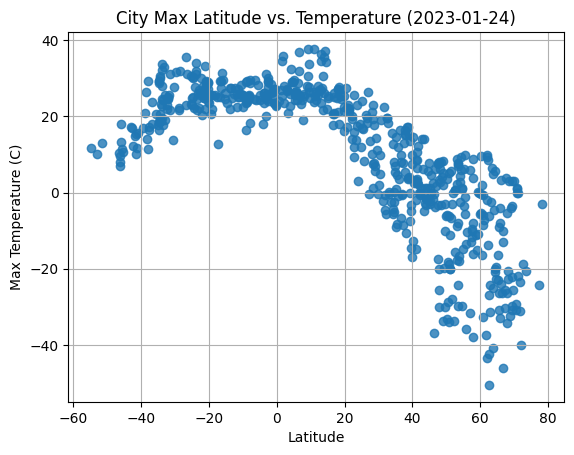

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(latitude, maximum_temperature, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-01-24)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

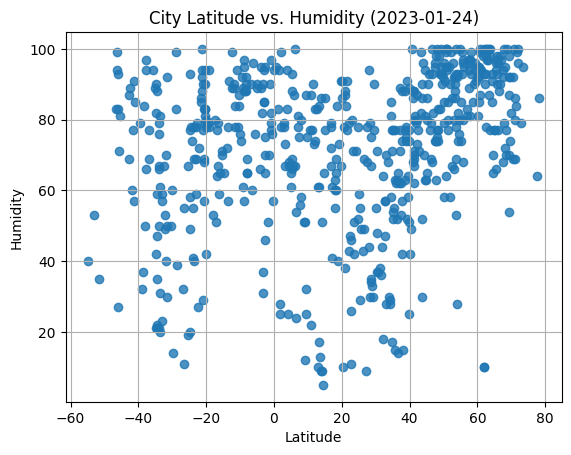

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitude, humidity, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-01-24)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

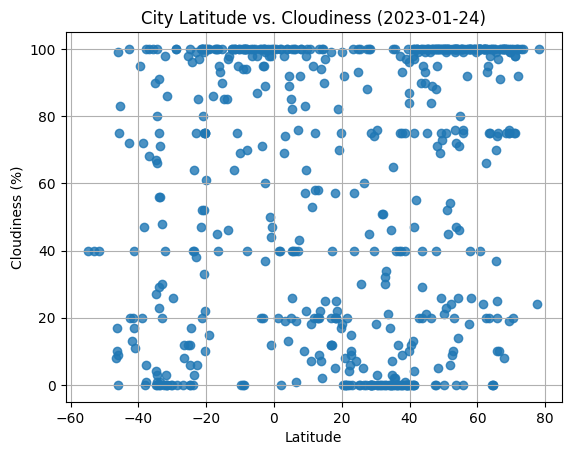

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude, cloudiness, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-01-24)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

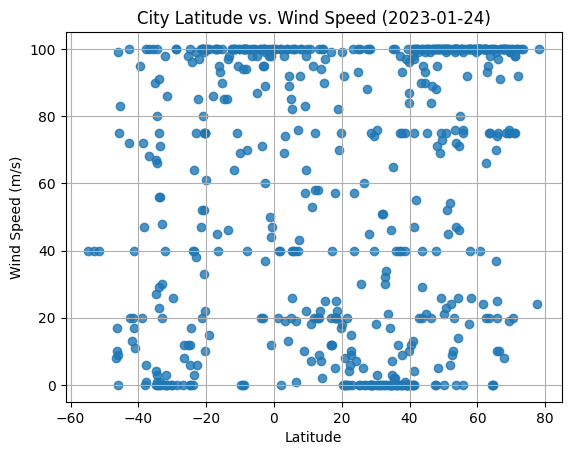

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude, cloudiness, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-01-24)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, textcoordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values*slope+intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress, "r-")
    plt.annotate(line_equation,textcoordinates, fontsize =10, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,2.51,100,0,5.14,US,1674567912
3,poronaysk,49.2167,143.1167,-19.81,95,100,11.67,RU,1674567913
5,vostok,46.4856,135.8833,-36.93,100,100,1.47,RU,1674567913
7,qaanaaq,77.4840,-69.3632,-24.30,64,24,3.11,GL,1674567914
9,sao filipe,14.8961,-24.4956,21.84,65,90,1.93,CV,1674567914


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,26.92,78,75,2.06,BR,1674567912
2,cape town,-33.9258,18.4232,22.84,50,75,5.66,ZA,1674567701
4,vaini,-21.2000,-175.2000,26.09,94,20,2.57,TO,1674567913
6,ushuaia,-54.8000,-68.3000,11.79,40,40,2.06,AR,1674567910
8,avarua,-21.2078,-159.7750,22.03,100,52,1.03,CK,1674567777


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6552004857125941


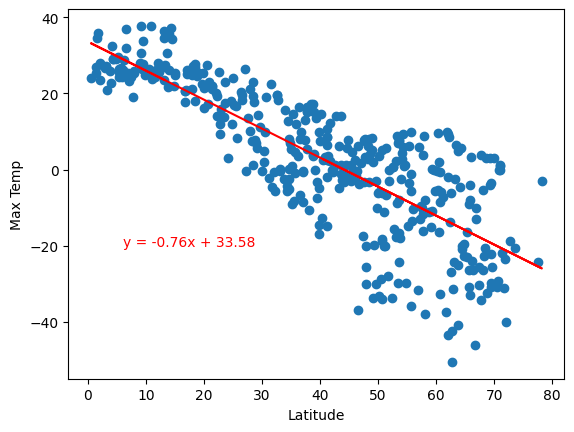

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 'Max Temp', (6,-20))


The r-value is: 0.2518635242513397


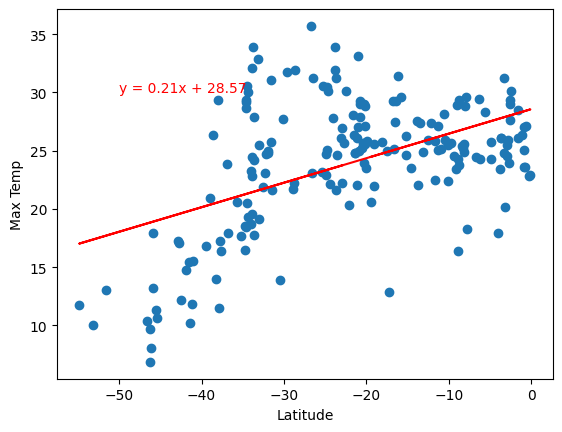

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 'Max Temp', (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1874694015260782


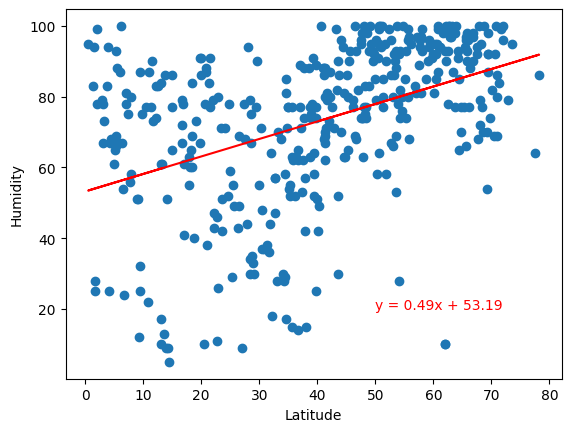

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression(x_values, y_values, 'Humidity', (50,20))

The r-value is: 0.07611689790382399


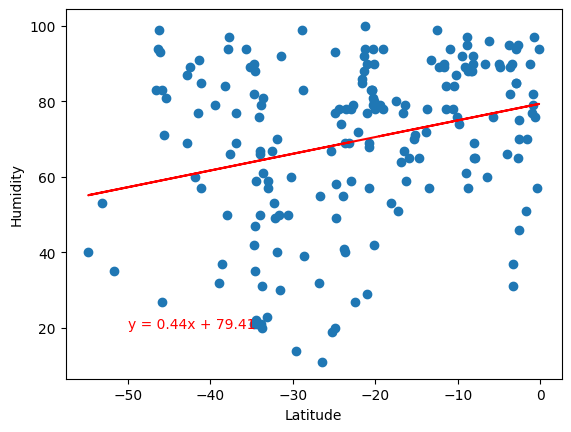

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, 'Humidity', (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09492470026823475


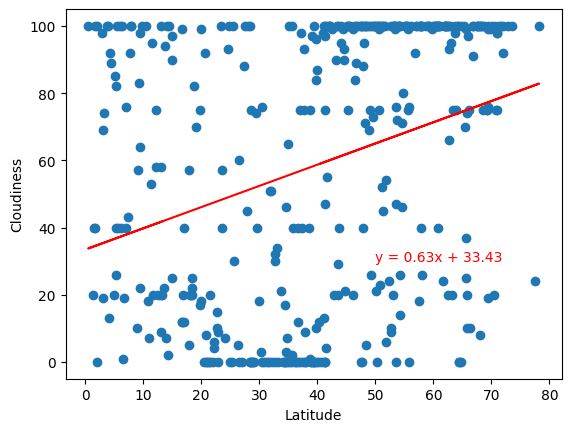

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 'Cloudiness', (50,30))

The r-value is: 0.19206484009114486


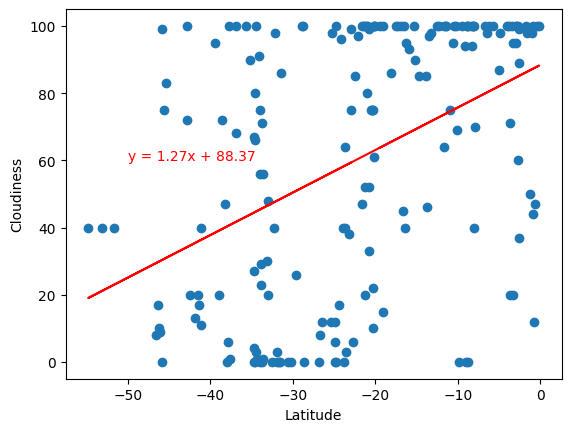

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 'Cloudiness', (-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00034746373745996425


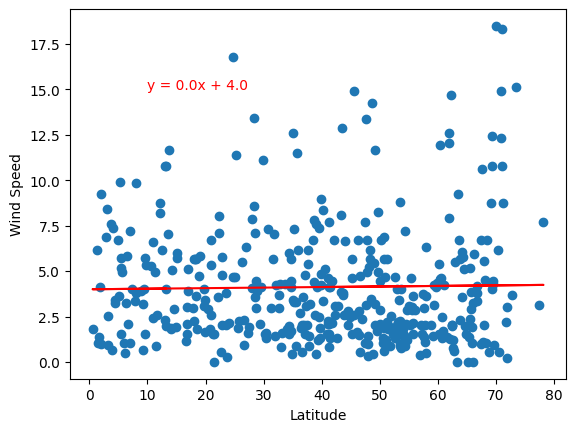

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 'Wind Speed', (10,15))

The r-value is: 0.08285418087057352


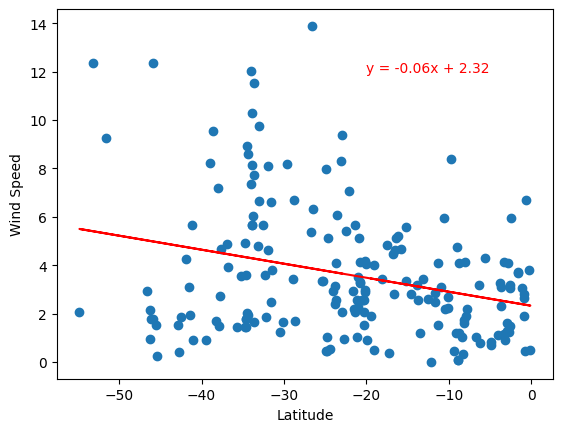

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 'Wind Speed', (-20,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE